In [13]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# This will prompt you to authorize Google Colab to access your Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Define the path to your Shapefile.
# The path must be relative to the mounted Google Drive.
file_path = "/content/drive/MyDrive/NHDPlusPN/NHDPlus17/NHDSnapshot/Hydrography/NHDFlowline.shp"

# Check if the file exists before attempting to read it.
if os.path.exists(file_path):
    try:
        # Read the Shapefile into a GeoDataFrame
        nhd_flowlines = gpd.read_file(file_path)

        # Print the first 5 rows to verify it loaded correctly
        print(nhd_flowlines.head())
        print("\nShapefile loaded successfully!")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f"Error: The file '{file_path}' does not exist.")


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


      COMID      FDATE RESOLUTION GNIS_ID GNIS_NAME  LENGTHKM       REACHCODE  \
0   9301535 1999-10-08     Medium    None      None     0.999  09040002011583   
1  22968128 2001-03-02     Medium    None      None     0.134  10030104009812   
2  22968138 2001-03-02     Medium    None      None     0.217  10030104009813   
3  23135995 2001-02-07     Medium    None      None     0.916  16010102003533   
4  23135997 2001-02-07     Medium    None      None     1.865  16010102003534   

         FLOWDIR  WBAREACOMI        FTYPE  FCODE  SHAPE_LENG ENABLED  \
0  Uninitialized           0  StreamRiver  46006    0.011661    True   
1  Uninitialized           0  StreamRiver  46003    0.001671    True   
2  Uninitialized           0  StreamRiver  46003    0.002145    True   
3  Uninitialized           0  StreamRiver  46003    0.010671    True   
4  Uninitialized           0  StreamRiver  46003    0.019193    True   

   GNIS_NBR                                           geometry  
0         0  LI

In [15]:
df_path = "/content/drive/MyDrive/NHDPlusPN/NHDPlus17/NHDPlusAttributes/PlusFlowlineVAA.dbf"

# Read DBF directly
df = gpd.read_file( df_path)

# Convert to pandas DataFrame (optional)
df = pd.DataFrame(df)

print(df.head())
print(df.columns)

        ComID      Fdate  StreamLeve  StreamOrde  StreamCalc    FromNode  \
0  22904955.0 2012-07-02         4.0         2.0         2.0  50002448.0   
1  22904959.0 2012-07-02         4.0         2.0         2.0  50002450.0   
2  22904961.0 2012-07-02         5.0         1.0         1.0  50143460.0   
3  22904965.0 2012-07-02         3.0         3.0         3.0  50002452.0   
4  22904963.0 2012-07-02         3.0         3.0         3.0  50002451.0   

       ToNode    Hydroseq  LevelPathI  Pathlength  ...  DivEffect  VPUIn  \
0  50002447.0  50064512.0  50055234.0    1212.961  ...        0.0    0.0   
1  50002449.0  50079322.0  50055234.0    1217.494  ...        0.0    0.0   
2  50002450.0  50231243.0  50231243.0    1217.577  ...        0.0    0.0   
3  50002451.0  50048700.0  50046093.0    1206.711  ...        0.0    0.0   
4  50002272.0  50046093.0  50046093.0    1206.647  ...        0.0    0.0   

   VPUOut  AreaSqKM  TotDASqKM  DivDASqKM  Tidal     TOTMA   WBAreaType  \
0     0.0  

In [16]:
# Rename the 'COMID' column in nhd_flowlines to 'ComID' to match the df dataframe
nhd_flowlines = nhd_flowlines.rename(columns={'COMID': 'ComID'})

merged_gdf = nhd_flowlines.merge(df, on='ComID', how='left')

print(merged_gdf)

           ComID      FDATE RESOLUTION  GNIS_ID               GNIS_NAME  \
0        9301535 1999-10-08     Medium     None                    None   
1       22968128 2001-03-02     Medium     None                    None   
2       22968138 2001-03-02     Medium     None                    None   
3       23135995 2001-02-07     Medium     None                    None   
4       23135997 2001-02-07     Medium     None                    None   
...          ...        ...        ...      ...                     ...   
272335  24545039 2005-08-27     Medium     None                    None   
272336  24545041 2005-08-27     Medium     None                    None   
272337  23706720 2001-02-28     Medium     None                    None   
272338  23931942 2001-03-14     Medium  1127294  South Fork Keene Creek   
272339  24279568 2001-04-17     Medium  1503026          Anderson Creek   

        LENGTHKM       REACHCODE         FLOWDIR  WBAREACOMI        FTYPE  \
0          0.999  0904

In [17]:
merged_gdf['StreamOrde'].unique()

array([nan,  2.,  6.,  3.,  1.,  4.,  5.,  7.,  8.,  9., -9.])

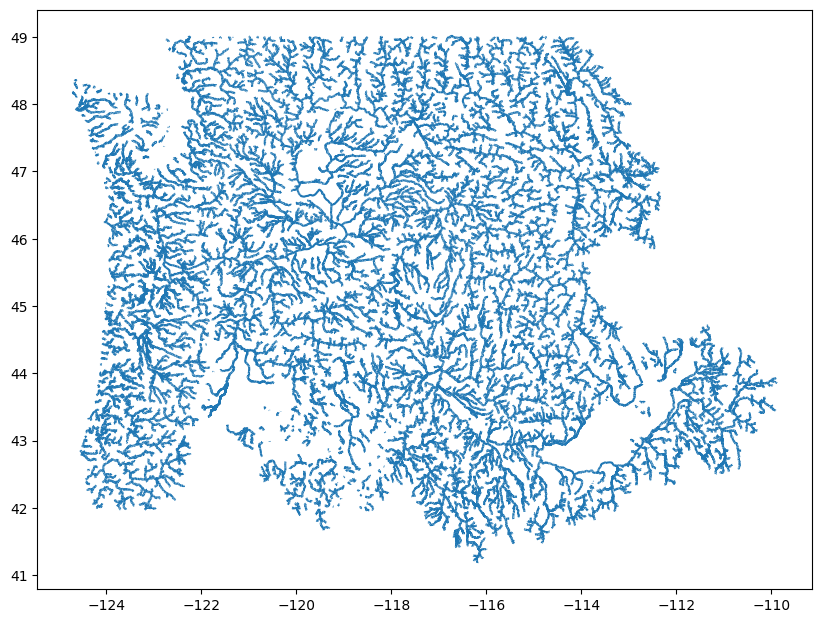

In [18]:
merged_gdf[merged_gdf['StreamOrde'].isin([3,4,5,6,7,8,9])].plot(figsize=(10, 10))
plt.show()


16

In [19]:
file_path_16 = "/content/drive/MyDrive/NHDPlusPN/NHDPlus16/NHDSnapshot/Hydrography/NHDFlowline.shp"

# Check if the file exists before attempting to read it.
if os.path.exists(file_path_16):
    try:
        # Read the Shapefile into a GeoDataFrame
        nhd_flowlines_16 = gpd.read_file(file_path_16)

        # Print the first 5 rows to verify it loaded correctly
        print(nhd_flowlines_16.head())
        print("\nShapefile loaded successfully!")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
else:
    print(f"Error: The file '{file_path_16}' does not exist.")

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D LineString' is converted to 'LineString Z'
  return ogr_read(


      ComID      FDate RESOLUTION GNIS_ID GNIS_Name  LengthKM       ReachCode  \
0  10809135 1999-07-23     Medium    None      None     1.029  14070005004751   
1  14600811 1999-08-20     Medium    None      None     1.838  15010008008442   
2  14600813 1999-08-20     Medium    None      None     0.211  15010008008443   
3  14600815 1999-08-20     Medium    None      None     1.875  15010008008444   
4  11362817 1999-08-20     Medium    None      None     1.119  15010011008455   

          FLOWDIR  WBAreaComI        FTYPE  FCode  Shape_Leng ENABLED  \
0   Uninitialized           0  StreamRiver  46003    0.009590    True   
1  With Digitized           0  StreamRiver  46003    0.018711    True   
2  With Digitized           0  StreamRiver  46003    0.001963    True   
3  With Digitized           0  StreamRiver  46003    0.020408    True   
4   Uninitialized           0  StreamRiver  46003    0.010183    True   

                                            geometry  
0  LINESTRING Z (-1

In [20]:
df_path_16 = "/content/drive/MyDrive/NHDPlusPN/NHDPlus16/NHDPlusAttributes/PlusFlowlineVAA.dbf"

# Read DBF directly
df_16 = gpd.read_file( df_path_16 )

# Convert to pandas DataFrame (optional)
df_16 = pd.DataFrame(df_16)

print(df_16.head())
print(df_16.columns)

       ComID      Fdate  StreamLeve  StreamOrde  StreamCalc     FromNode  \
0  7880790.0 2012-03-22         7.0         2.0         2.0  800008676.0   
1  7879430.0 2012-03-22         7.0         2.0         2.0  800008555.0   
2  7879436.0 2012-03-22         7.0         2.0         2.0  800008558.0   
3  7879444.0 2012-03-22         8.0         1.0         1.0  800064123.0   
4  7879582.0 2012-03-22         5.0         3.0         3.0  800008600.0   

        ToNode     Hydroseq   LevelPathI  Pathlength  ...  DivEffect  VPUIn  \
0  800008556.0  800036316.0  800031253.0     588.610  ...        0.0    0.0   
1  800008676.0  800043878.0  800031253.0     592.266  ...        0.0    0.0   
2  800008555.0  800056858.0  800031253.0     596.978  ...        0.0    0.0   
3  800008558.0  800090925.0  800090925.0     601.303  ...        0.0    0.0   
4  800008679.0  800022584.0  800013711.0     611.027  ...        0.0    0.0   

   VPUOut  AreaSqKM  TotDASqKM  DivDASqKM  Tidal     TOTMA  WBAreaTy

In [21]:
nhd_flowlines_16 = nhd_flowlines_16.rename(columns={'COMID': 'ComID'})

merged_gdf_16 = nhd_flowlines_16.merge(df_16, on='ComID', how='left')

print(merged_gdf_16)

           ComID      FDate RESOLUTION GNIS_ID GNIS_Name  LengthKM_x  \
0       10809135 1999-07-23     Medium    None      None       1.029   
1       14600811 1999-08-20     Medium    None      None       1.838   
2       14600813 1999-08-20     Medium    None      None       0.211   
3       14600815 1999-08-20     Medium    None      None       1.875   
4       11362817 1999-08-20     Medium    None      None       1.119   
...          ...        ...        ...     ...       ...         ...   
113075  11677435 2008-06-23     Medium    None      None       0.294   
113076  11677443 2008-06-23     Medium    None      None       0.570   
113077  11677725 2008-06-23     Medium    None      None       8.949   
113078  11677431 2008-06-23     Medium    None      None       4.727   
113079  11677731 2008-06-23     Medium    None      None       7.611   

           ReachCode_x         FLOWDIR  WBAreaComI        FTYPE  ...  \
0       14070005004751   Uninitialized           0  StreamRiver

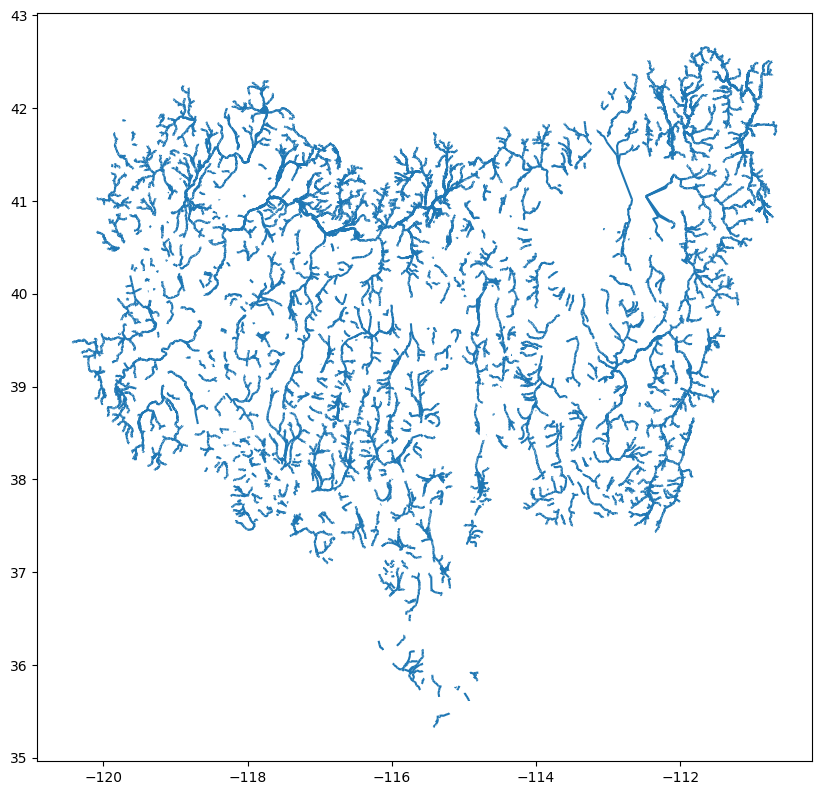

In [22]:
merged_gdf_16[merged_gdf_16['StreamOrde'].isin([3,4,5,6,7,8,9])].plot(figsize=(10, 10))
plt.show()